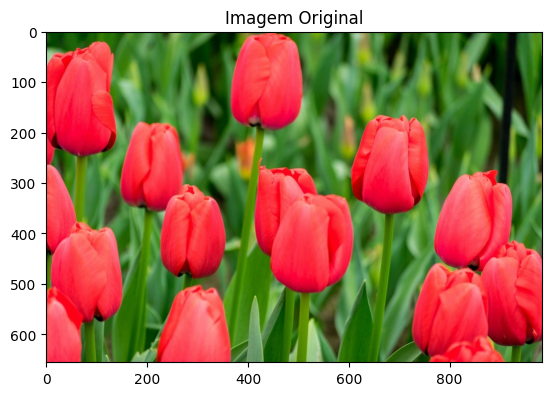

In [2]:
import cv2 as cv
import numpy as np
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans as km

img = mpl.image.imread("images/image02_1.jpg")
plt.title("Imagem Original")
plt.imshow(img)

In [3]:
# Representar um aglomerado de pixels os quais possuem diferentes coordenadas RGB
X = img.reshape(-1,3)
X = np.float32(X)

In [4]:
# Definir um número de centroides
k = 3

kmeans = km(n_clusters=k,n_init=50).fit(X)
centers = np.uint8(kmeans.cluster_centers_)
labels = kmeans.labels_
seg_img = centers[labels]

# kmeans.cluster_centers_: Vai mostrar a cor específica(coordenadas) para cada cluster
# kmeans.labels_: Vai mostrar qual cluster cada pixel é representado

# Juntando os dois, cada pixel vai ter as coordenadas exatas do seu respectivo cluster

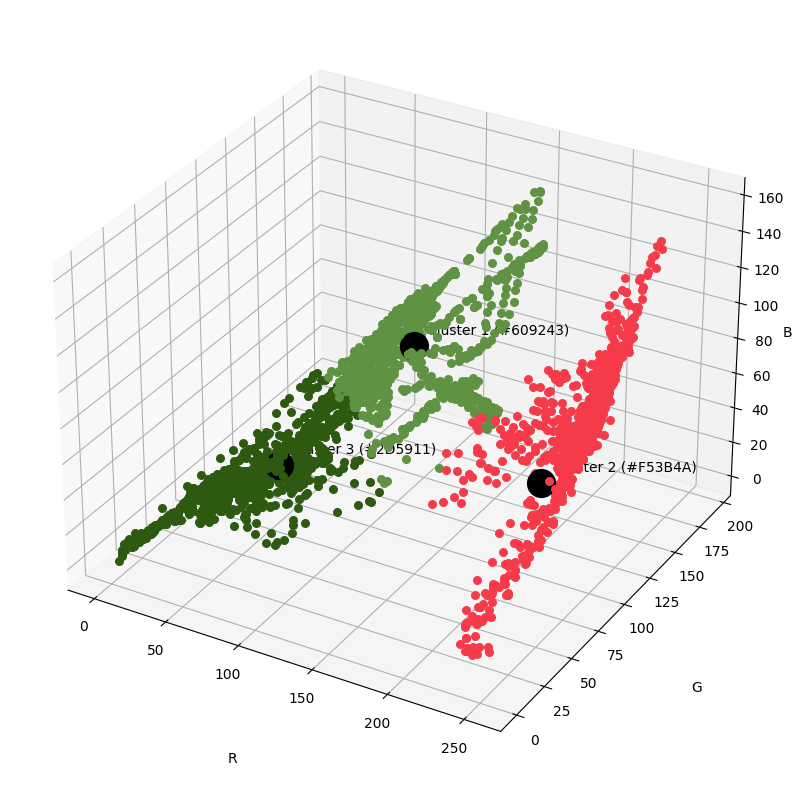

In [12]:
def rgb_to_hex(arr):
    return ('{:02X}' * 3).format(arr[0], arr[1], arr[2])


fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.set_xlabel("R", labelpad=30)
ax.set_ylabel("G", labelpad=30)
ax.set_zlabel("B", labelpad=30)
ax.zaxis.labelpad = 1

colors = [f"#{rgb_to_hex(RGB)}" for RGB in centers]

for i in range(k):
    # Procurando a possição dos pixels por classe (cluster)
    arr_px_clust = np.array(np.where(labels == i))[0]

    # Amostra de 1000 px's
    for j in range(1000):
        # Pegando uma amostra de pixels de cada classe
        px = X[arr_px_clust[j]]
        ax.scatter(px[0], px[1], px[2], c=colors[i], s=30)

    ax.scatter(centers[i][0], centers[i][1], centers[i][2], c='black', s=400)
    ax.text(centers[i][0] + 5, centers[i][1] + 5, centers[i][2] + 5, f"Cluster {i+1} ({colors[i]})")

plt.show()

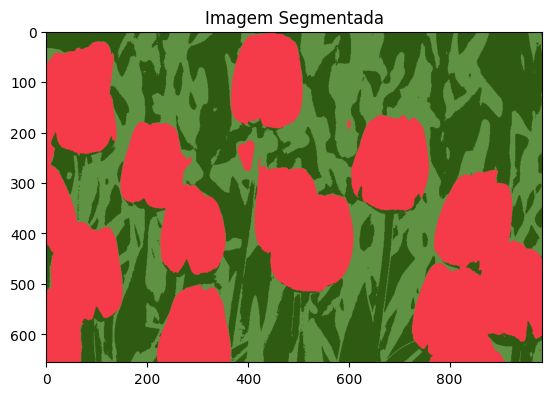

In [5]:
# Voltando para o formato da imagem original

seg_img = seg_img.reshape(img.shape)
plt.title("Imagem Segmentada")
plt.imshow(seg_img)

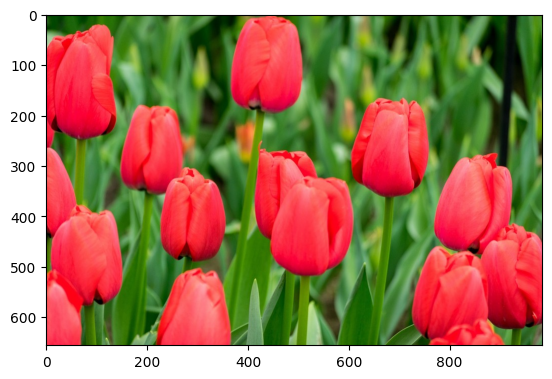

In [6]:
plt.imshow(img)